# VIPERS SHAM Project

This notebook is part of the VIPERS-SHAM project:
http://arxiv.org/abs/xxxxxxx

Copyright 2019 by Ben Granett, granett@gmail.com
All rights reserved.
This file is released under the "MIT License Agreement". Please see the LICENSE
file that should have been included as part of this package.

In [1]:
%matplotlib inline
import os
from matplotlib import pyplot as plt
plt.style.use("small.style")
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter
from matplotlib import colors,cm,ticker,transforms


import logging
logging.basicConfig(level=logging.INFO)


import numpy as np

import load

In [2]:
samples = ('M1','M4')

In [3]:
def get_vipers(sample='A', **plotparams):
    """ """
    path = "../data/vipers/wp_s{sample}.txt".format(sample=sample)
    try:
        rp, w = np.loadtxt(path, unpack=True)
    except IOError:
        print "can't load", path
        return None, None
    
    path = "../data/vipers/cov_L{sample}.txt".format(sample=sample[1])
    try:
        cmat = np.loadtxt(path)
    except IOError:
        print "can't load", path
    sigma = cmat.diagonal()**.5
    
    return rp, w, sigma

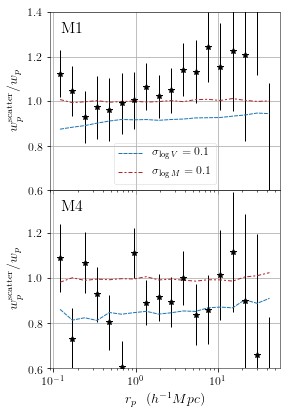

In [4]:
plt.figure(figsize=(4,6))
ax0 = plt.subplot(211)
plt.text(0.05,0.95,"M1",ha='left',va='top',transform=ax0.transAxes, fontsize=16)
    
    
r,w,sig = get_vipers('M1')

xref,yref = np.loadtxt("../data/sham400/nz_L1/wp_snap0.62230.txt", unpack=True)
plt.errorbar(xref,w/yref, sig/yref, c='k', marker="*", ls='None')

x,y = np.loadtxt("../data/sham400/nz_v1/wp_snap0.62230_M1_scattv01.dat", unpack=True)
plt.semilogx(x,y/yref,dashes=[4,1], label="$\sigma_{\log V} = 0.1$")

x,y = np.loadtxt("../data/sham400/nz_m1/wp_snap0.62230_M1_scatt01.dat", unpack=True)
plt.semilogx(x,y/yref, dashes=[4,2,2,2], label="$\sigma_{\log M} = 0.1$", c='firebrick')

plt.grid()
plt.ylim(0.6,1.4)

ax0.tick_params(labelbottom=False)

plt.legend(loc='lower center')
plt.ylabel("$w_p^{\\rm scatter}/w_p$")

ax1 = plt.subplot(212)
plt.text(0.05,0.95,"M4",ha='left',va='top',transform=ax1.transAxes, fontsize=16)



r,w,sig = get_vipers('M4')

xref,yref = np.loadtxt("../data/sham400/nz_L4/wp_snap0.53000.txt", unpack=True)
plt.errorbar(xref,w/yref, sig/yref, c='k', marker="*", ls='None')

x,y = np.loadtxt("../data/sham400/nz_v4/wp_snap0.53000_M4_scattv01.dat", unpack=True)
plt.semilogx(x,y/yref, dashes=[4,1])

x,y = np.loadtxt("../data/sham400/nz_m4/wp_snap0.53000_M4_scatt01.dat", unpack=True)
plt.semilogx(x,y/yref, dashes=[4,2,2,2], c='firebrick')

plt.grid()

plt.ylim(0.6,1.39)

plt.xlabel("$r_p\ \ (h^{-1}Mpc)$")
plt.ylabel("$w_p^{\\rm scatter}/w_p$")

plt.subplots_adjust(hspace=0)

plt.savefig("../figs/fig6.pdf")